MOVIE RECOMMENDATION SYSTEM                          

DEPENDENCIES (to be run only once)

In [71]:
# !pip install numpy pandas scikit-learn matplotlib seaborn pickle-mixin

IMPORT LIBRARIES

In [72]:
# Data Handling and Processing
import numpy as np        # Numerical operations
import pandas as pd       # Data manipulation and CSV reading
import os                 # File and folder operations
import ast                # Parse JSON-like strings from CSV
import pickle             # Save/load processed data

# Text vectorization and Similarity calculations
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Visualizations 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


EXPLORATORY DATA ANALYSIS

Movies dataset shape: (4809, 23)
Columns in dataset: ['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count', 'movie_id', 'cast', 'crew']

Sample data:


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."



Missing values per column:
budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genre

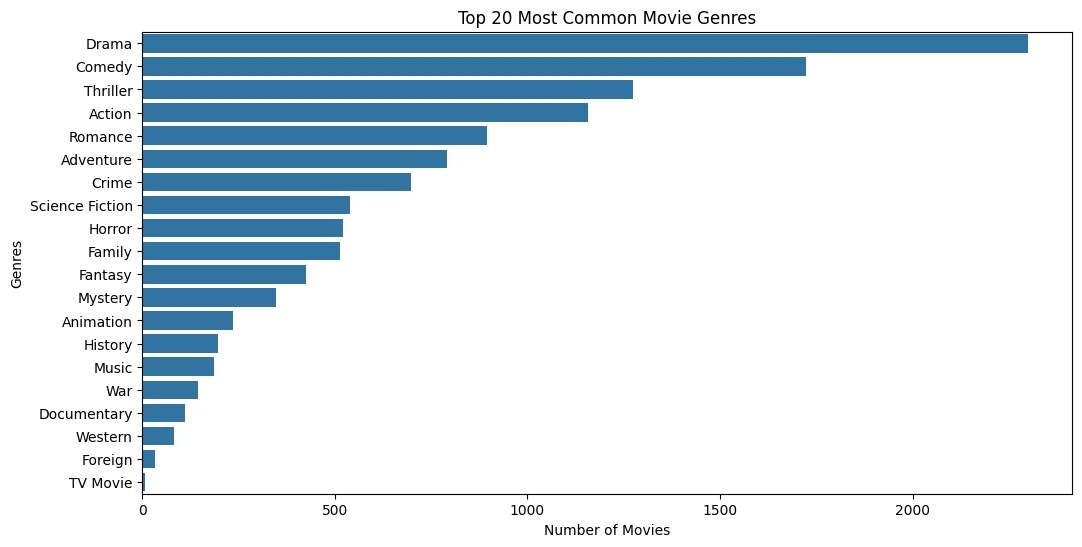

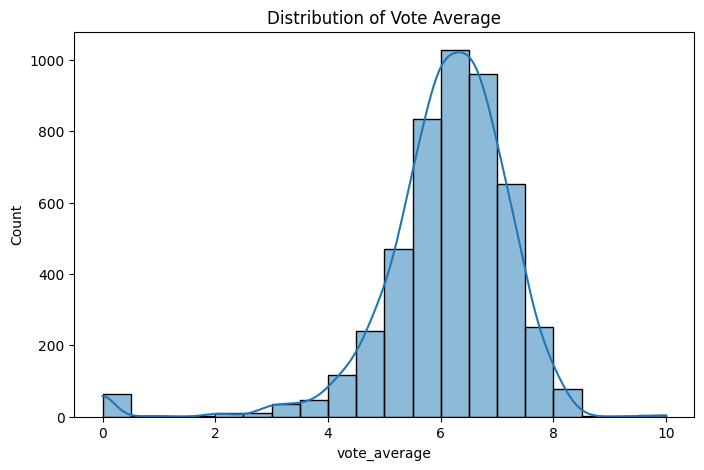


Top 10 Most Popular Movies:


,title,popularity
546,Minions,875.581305
95,Interstellar,724.247784
788,Deadpool,514.569956
94,Guardians of the Galaxy,481.098624
127,Mad Max: Fury Road,434.278564
28,Jurassic World,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889
82,Dawn of the Planet of the Apes,243.791743
200,The Hunger Games: Mockingjay - Part 1,206.227151
88,Big Hero 6,203.734590



Top 10 Highest Rated Movies (with >500 votes):


,title,vote_average
1883,The Shawshank Redemption,8.5
3340,The Godfather,8.4
2296,Spirited Away,8.3
662,Fight Club,8.3
2733,The Godfather: Part II,8.3
3870,Whiplash,8.3
1820,Schindler's List,8.3
3235,Pulp Fiction,8.3
1989,Howl's Moving Castle,8.2
809,Forrest Gump,8.2


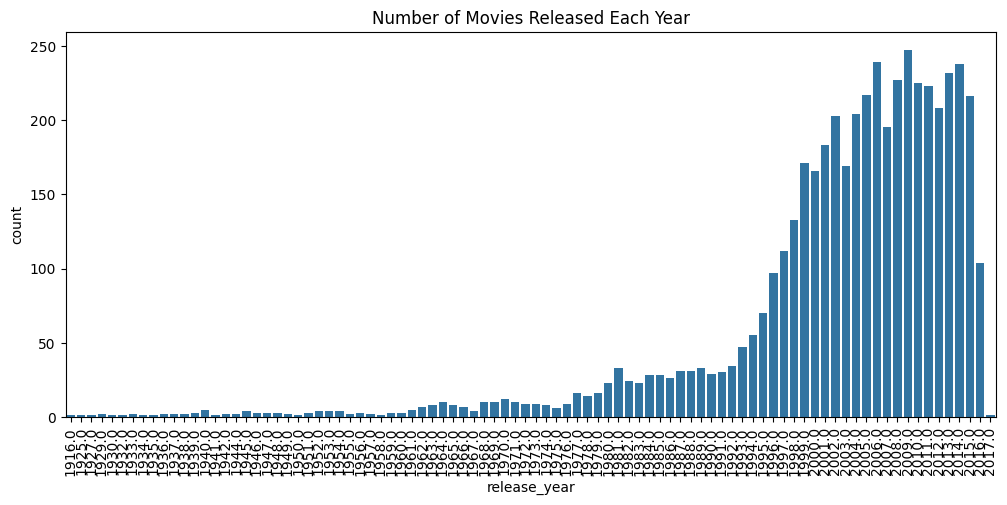

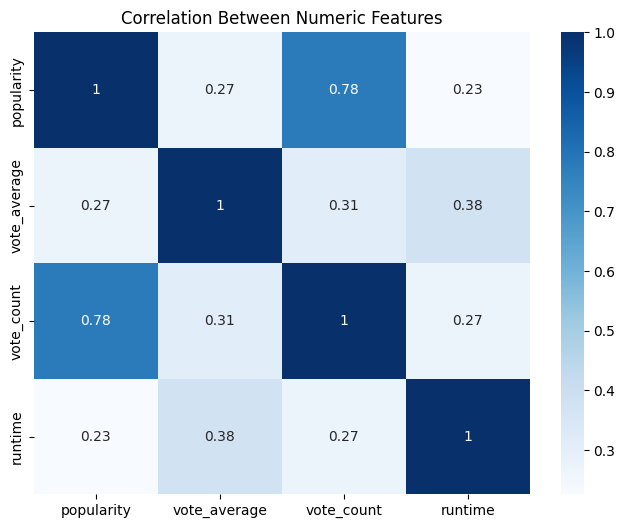

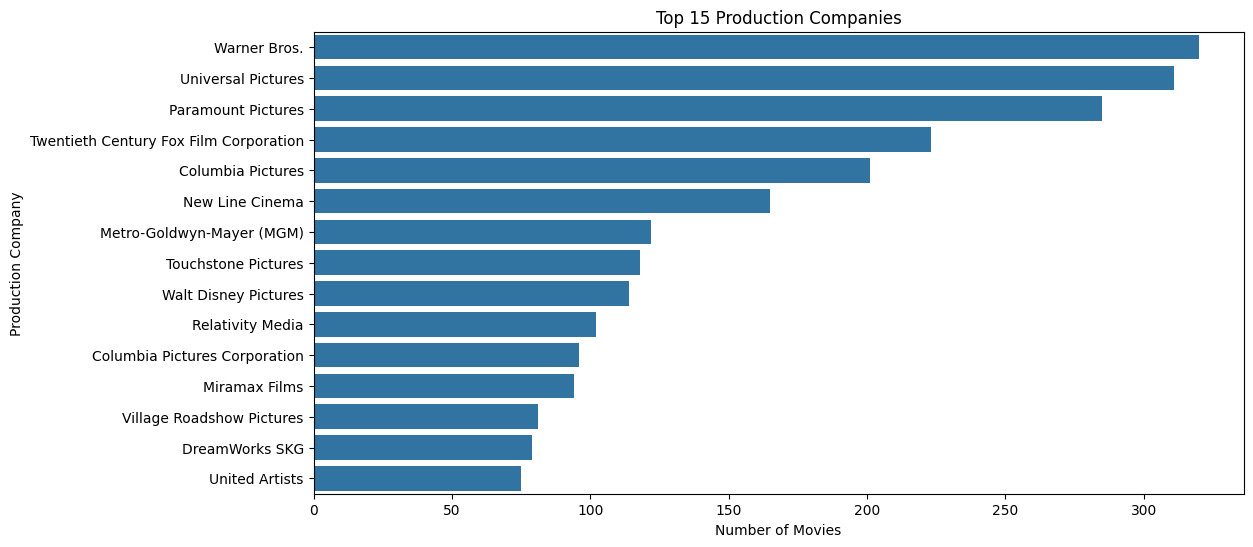

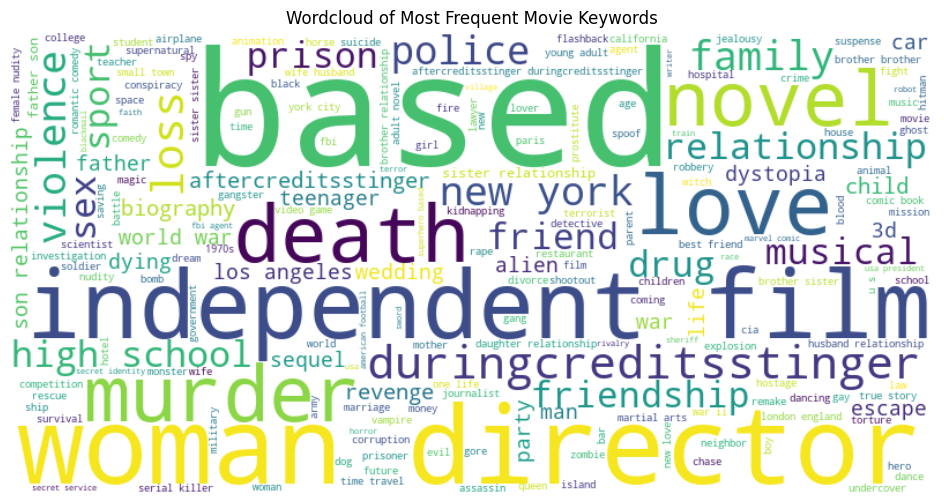

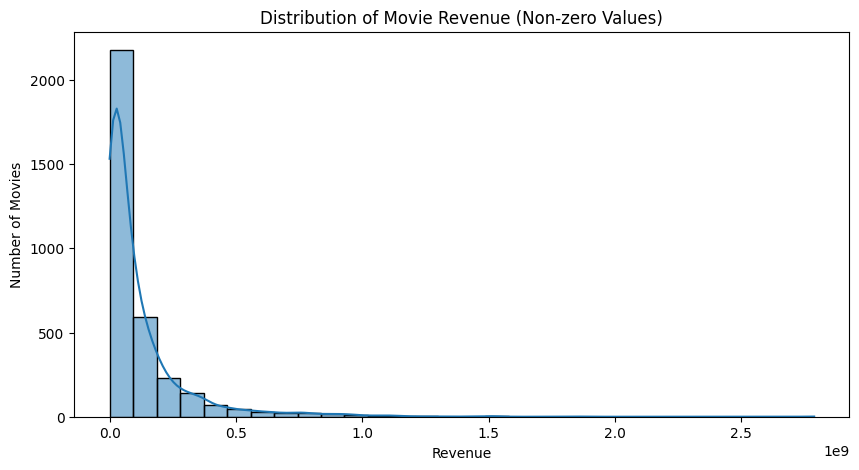

In [73]:
# Load movie and credit datasets
movies = pd.read_csv('data/tmdb_5000_movies.csv')
credits = pd.read_csv('data/tmdb_5000_credits.csv')

# Merge movies and credits datasets on 'title'
movies = movies.merge(credits, on='title')

# Quick overview of dataset
print("Movies dataset shape:", movies.shape)
print("Columns in dataset:", movies.columns.tolist())
print("\nSample data:")
display(movies.head(3))

# Check missing values per column
print("\nMissing values per column:")
print(movies.isnull().sum())

# Dataset info (data types, non-null counts)
print("\nDataset Information:")
movies.info()

# Extract genres as a list for each movie
movies['genres_list'] = movies['genres'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)])
all_genres = [genre for sublist in movies['genres_list'] for genre in sublist]

# Top 20 most common genres
plt.figure(figsize=(12,6))
genre_counts = pd.Series(all_genres).value_counts().head(20)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top 20 Most Common Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genres")
plt.show()

# Distribution of vote averages
plt.figure(figsize=(8,5))
sns.histplot(movies['vote_average'], bins=20, kde=True)
plt.title("Distribution of Vote Average")
plt.show()

# Top 10 most popular movies
top_popular = movies[['title', 'popularity']].sort_values(by='popularity', ascending=False).head(10)
print("\nTop 10 Most Popular Movies:")
display(top_popular)

# Top 10 highest rated movies with >500 votes
top_rated = movies[movies['vote_count'] > 500][['title', 'vote_average']].sort_values(by='vote_average', ascending=False).head(10)
print("\nTop 10 Highest Rated Movies (with >500 votes):")
display(top_rated)

# Trend of movie releases by year
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies['release_year'] = movies['release_date'].dt.year

plt.figure(figsize=(12,5))
sns.countplot(x='release_year', data=movies[movies['release_year'].notnull()],order=sorted(movies['release_year'].dropna().unique()))
plt.xticks(rotation=90)
plt.title("Number of Movies Released Each Year")
plt.show()

# Correlation between numeric features
plt.figure(figsize=(8,6))
sns.heatmap(movies[['popularity', 'vote_average', 'vote_count', 'runtime']].corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Numeric Features")
plt.show()


# Top 15 production companies
all_companies = [comp['name'] for sublist in movies['production_companies'].dropna().apply(ast.literal_eval) for comp in sublist]
top_companies = pd.Series(all_companies).value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title("Top 15 Production Companies")
plt.xlabel("Number of Movies")
plt.ylabel("Production Company")
plt.show()

# Wordcloud of most frequent keywords
all_keywords = [keyword['name'] for sublist in movies['keywords'].dropna().apply(ast.literal_eval) for keyword in sublist]
keyword_text = " ".join(all_keywords)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keyword_text)

plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of Most Frequent Movie Keywords")
plt.show()

# Distribution of movie revenue (excluding zero values)
plt.figure(figsize=(10,5))
sns.histplot(movies['revenue'][movies['revenue']>0], bins=30, kde=True)
plt.title("Distribution of Movie Revenue (Non-zero Values)")
plt.xlabel("Revenue")
plt.ylabel("Number of Movies")
plt.show()


Data Processing & Tag Creation

In [74]:
# Functions to process JSON-like columns
def convert(text):
    """Extract 'name' from JSON-like strings; return as list."""
    try:
        return [i['name'] for i in ast.literal_eval(text)]
    except:
        return []

def convert3(text):
    """Extract top 3 cast members from JSON-like string."""
    try:
        return [i['name'] for i in ast.literal_eval(text)][:3]
    except:
        return []

def fetch_director(text):
    """Extract director name(s) from crew JSON-like string."""
    try:
        return [i['name'] for i in ast.literal_eval(text) if i['job'] == 'Director']
    except:
        return []

def collapse(L):
    """Remove spaces from each string in a list."""
    return [i.replace(" ", "") for i in L]

# Preprocess Movies Dataset

# Drop rows with nulls to avoid errors
movies.dropna(inplace=True)

# Apply conversions to relevant columns
movies['genres'] = movies['genres'].apply(convert).apply(collapse)
movies['keywords'] = movies['keywords'].apply(convert).apply(collapse)
movies['cast'] = movies['cast'].apply(convert3).apply(collapse)
movies['crew'] = movies['crew'].apply(fetch_director).apply(collapse)

# Split overview into words
movies['overview'] = movies['overview'].apply(lambda x: x.split())

# Combine all text info into a single 'tags' column
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

# Keep only relevant columns
movies = movies[['movie_id', 'title', 'tags']]

# Convert list of words into a single string (needed for vectorization)
movies['tags'] = movies['tags'].apply(lambda x: " ".join(x))

# Final confirmation
print(f"Processed movies dataset shape: {movies.shape}")
movies.head(3)


Processed movies dataset shape: (1494, 3)


,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...


TF-IDF Vectorization & Cosine Similarity

In [75]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['tags'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)

# Cosine Similarity Matrix
similarity = cosine_similarity(tfidf_matrix)

print("Cosine similarity matrix created. Shape:", similarity.shape)

# Save processed data and similarity matrix for future use
pickle.dump(movies, open('data/movies.pkl', 'wb'))
pickle.dump(similarity, open('data/similarity.pkl', 'wb'))

print(" Movies dataframe and similarity matrix saved as pickle files.")


TF-IDF matrix shape: (1494, 5000)
Cosine similarity matrix created. Shape: (1494, 1494)
 Movies dataframe and similarity matrix saved as pickle files.


Movie-Based Recommendation 

In [76]:
def recommend(movie_name, movies_df=movies, similarity_matrix=similarity):
    """ Recommends top 5 movies similar to the given movie_name. """
    
     # Check if movie exists
    if movie_name not in movies_df['title'].values:
        return f"Movie '{movie_name}' not found in dataset."
    
    # Get index of the movie
    idx = movies_df[movies_df['title'] == movie_name].index[0]
    
    # Get list of tuples (movie_index, similarity_score)
    sim_scores = list(enumerate(similarity_matrix[idx]))
    
    # Sort by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Pick top 5 similar movies (excluding the input movie itself)
    top_5_idx = [i[0] for i in sim_scores[1:6]]
    
    # Return movie titles
    recommended_movies = movies_df.iloc[top_5_idx]['title'].tolist()
    return recommended_movies


print("Recommendations for 'Avatar':")
print(recommend('Avatar'))

print("\nRecommendations for 'The Dark Knight Rises':")
print(recommend('The Dark Knight Rises'))

print("\nRecommendations for 'Inception':")
print(recommend('Inception'))


Recommendations for 'Avatar':
['Battle: Los Angeles', 'Apollo 18', "Ender's Game", 'Galaxina', 'Aliens vs Predator: Requiem']

Recommendations for 'The Dark Knight Rises':
['The Dark Knight', 'Batman Begins', 'Batman v Superman: Dawn of Justice', 'Survivor', 'Secret in Their Eyes']

Recommendations for 'Inception':
['Happy Feet', 'Happy Feet Two', 'March of the Penguins', 'Roar', 'The Lion King']


Mood or Keyword-Based Recommendation Function

In [77]:
def recommend_by_mood(movie_name, mood_keywords, movies_df=movies, similarity_matrix=similarity):
    """  Recommends movies similar to a given movie and filtered by mood/keywords. """
    
    # Check if movie exists
    if movie_name not in movies_df['title'].values:
        return f"Movie '{movie_name}' not found in dataset."

    # Get index of the movie
    idx = movies_df[movies_df['title'] == movie_name].index[0]

    # Get similarity scores for all movies
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    recommended_movies = []

    # Filter top movies by mood/keyword
    for i in sim_scores[1:]:
        movie_idx = i[0]
        movie_tags = movies_df.iloc[movie_idx]['tags'].lower()
        # Check if any of the mood keywords appear in movie tags
        if any(keyword.lower() in movie_tags for keyword in mood_keywords):
            recommended_movies.append(movies_df.iloc[movie_idx]['title'])
        if len(recommended_movies) == 5:
            break

    return recommended_movies

 # We have used weird or uncommon mood/keywords combinations
print("Harry Potter and the Goblet of Fire with Zombie/Cooking keywords")
print(recommend_by_mood('Harry Potter and the Goblet of Fire', ['Zombie', 'Cooking']))

print("\nFinding Nemo with Magic/Romance keywords")
print(recommend_by_mood('Finding Nemo', ['Magic', 'Romance']))

print("\nOceans with Supernatural/Political keywords")
print(recommend_by_mood('Oceans', ['Supernatural', 'Political']))


Harry Potter and the Goblet of Fire with Zombie/Cooking keywords
['Ratatouille', 'Maze Runner: The Scorch Trials', 'Hotel Transylvania', 'Johnny English Reborn', 'Detention of the Dead']

Finding Nemo with Magic/Romance keywords
['Undiscovered', 'Alex & Emma', 'Inherent Vice', 'The Next Three Days', 'Duplicity']

Oceans with Supernatural/Political keywords
['Sky High', 'Jumper', 'Dreamcatcher', 'The Grudge 2', 'Hereafter']


Creative Weighted Recommendation

In [78]:
def recommend_creative(movie_name, movies_df=movies, similarity_matrix=similarity, 
                       genre_weight=0.5, cast_weight=0.3, keyword_weight=0.2, 
                       recent_release_bonus=True):
    """ Recommend top 5 movies based on a weighted combination of genres, cast, and keywords and boots recent releases."""
    
    # Get index of the movie
    index = movies_df[movies_df['title'] == movie_name].index[0]
    similarities = similarity_matrix[index]
    
    # Apply weighting (simple sum of weights for demonstration)
    weighted_sim = similarities * (genre_weight + cast_weight + keyword_weight)
    
    # Recency boost
    if recent_release_bonus and 'release_date' in movies_df.columns:
        release_year = pd.to_datetime(movies_df['release_date'], errors='coerce').dt.year.fillna(2000)
        current_year = pd.Timestamp.now().year
        recency_bonus = 1 / (1 + (current_year - release_year)/50)
        weighted_sim *= recency_bonus
    
    # Pick top 5 similar movies (excluding the input obviously !)
    recommended_indices = sorted(enumerate(weighted_sim), reverse=True, key=lambda x: x[1])[1:6]
    return [movies_df.iloc[i[0]].title for i in recommended_indices]

print("Creative Recommendations for 'The Matrix':")
print(recommend_creative('The Matrix'))

print("\nCreative Recommendations for 'The Lion King':")
print(recommend_creative('The Lion King'))


Creative Recommendations for 'The Matrix':
['Free Style', 'War Horse', 'Hesher', 'Fur: An Imaginary Portrait of Diane Arbus', 'Freedom Writers']

Creative Recommendations for 'The Lion King':
['The Scorpion King', 'Oceans', 'Broken City', 'Downfall', 'The Good German']
